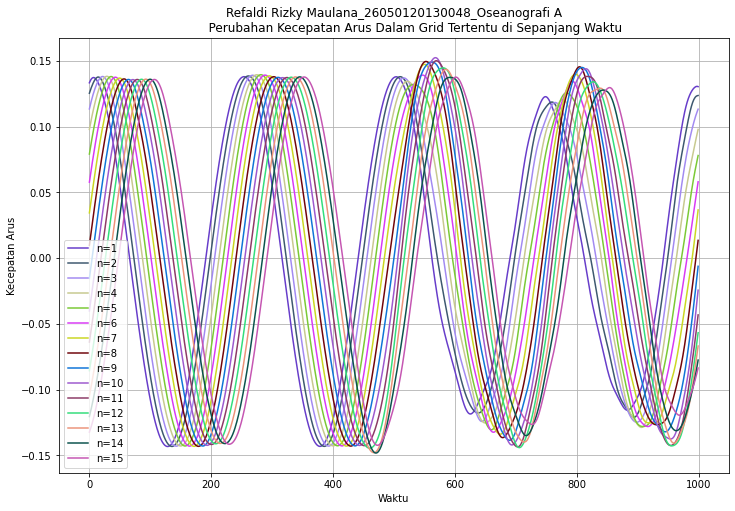

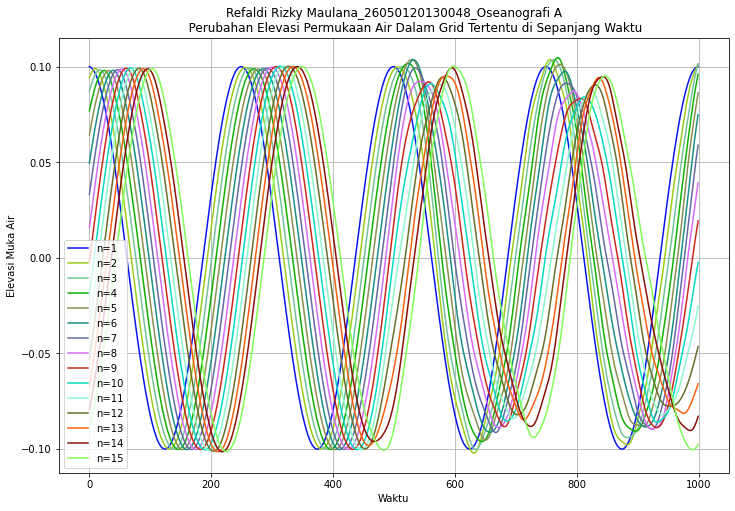

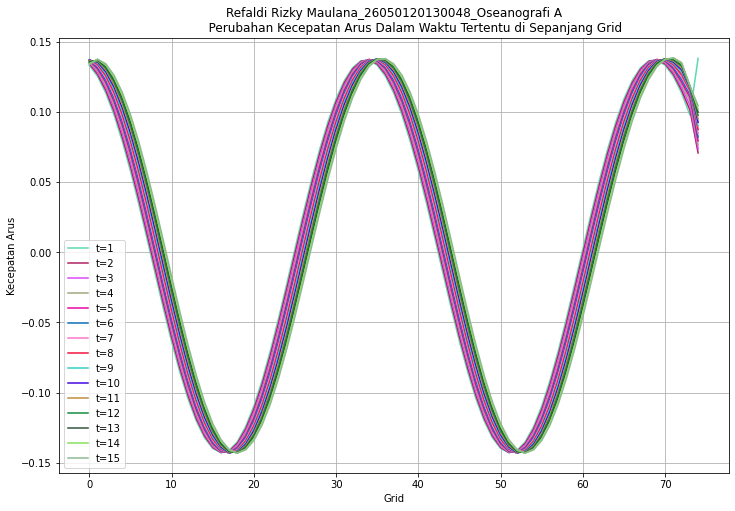

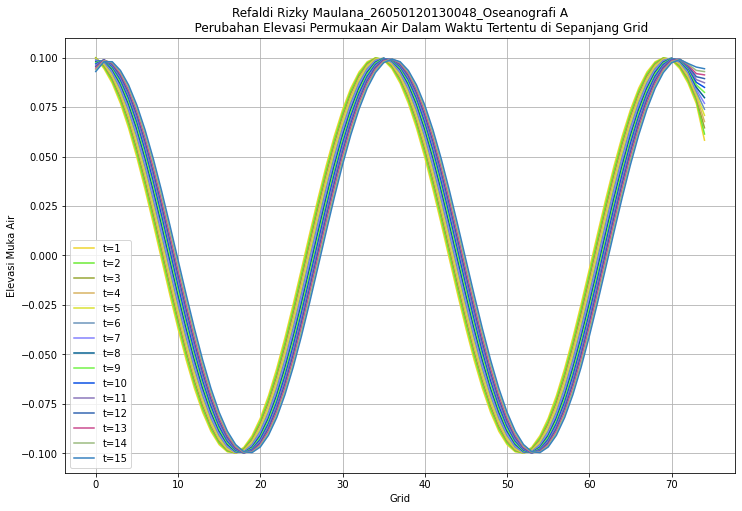

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#-------------------------------------------------------------------------------
#                                      Proses Awal
#--------------------------------------------------------------------------------

p = 7500 #Panjang Grid
T = 2000 #Waktu Simulasi
A = 0.1 #Amplitudo
D = 5 #Depth/Kedalaman
dt = 2 
dx = 100
To = 500 #Periode

g = 9.8
pi = np.pi
C = np.sqrt(g*D) #Kecepatan Arus
s = 2*pi/To #Kecepatan Sudut Gelombang
L = C*To #Panjang Gelombang
k = 2*pi/L #Koefisien Panjang Gelombang
Mmax = int(p//dx)
Nmax = int(T//dt)

zo = [None for _ in range(Mmax)]
uo = [None for _ in range(Mmax)]

hasilu = [None for _ in range(Nmax)]
hasilz = [None for _ in range(Nmax)]

for i in range(1, Mmax+1):
    zo[i-1] = A*np.cos(k*(i)*dx)
    uo[i-1] = A*C*np.cos(k*((i)*dx+(0.5)*dx))/(D+zo[i-1])
    
for i in range(1, Nmax+1):
    zb = [None for _ in range(Mmax)]
    ub = [None for _ in range(Mmax)]
    zb[0] = A*np.cos(s*(i)*dt)
    ub[-1] = A*C*np.cos(k*L-s*(i)*dt)/(D+zo[-1])
    for j in range(1, Mmax):
        ub[j-1] = uo[j-1]-g*(dt/dx)*(zo[j]-zo[j-1])
    for k in range(2, Mmax+1):
        zb[k-1] = zo[k-1]-(D+zo[k-1])*(dt/dx)*(ub[k-1]-ub[k-2])
        hasilu[i-1] = ub
        hasilz[i-1] = zb
    for p in range(0, Mmax):
        uo[p] = ub[p]
        zo[p] = zb[p]
        
#----------------------------------------------------------------------------------
#                                  PEMBUATAN GRAFIK
#----------------------------------------------------------------------------------

def rand_col_hex_string():
    return f'#{format(np.random.randint(0,16777215), "#08x")[2:]}'

hasilu_np = np.array(hasilu)
hasilz_np = np.array(hasilz)

fig0, ax0 = plt.subplots(figsize=(12,8))
for i in range(1, 16):
    col0 = rand_col_hex_string()
    line, = ax0.plot(hasilu_np[:,i-1], c=col0, label=f'n={i}')
    ax0.legend()
    
    ax0.set(xlabel='Waktu', ylabel='Kecepatan Arus',
           title='''Refaldi Rizky Maulana_26050120130048_Oseanografi A
           Perubahan Kecepatan Arus Dalam Grid Tertentu di Sepanjang Waktu''')
    ax0.grid()
    
fig1, ax1 = plt.subplots(figsize=(12,8))
for i in range(1, 16):
    col1 = rand_col_hex_string()
    line, = ax1.plot(hasilz_np[:,i-1], c=col1, label=f'n={i}')
    ax1.legend()
    
    ax1.set(xlabel='Waktu', ylabel='Elevasi Muka Air',
           title='''Refaldi Rizky Maulana_26050120130048_Oseanografi A
           Perubahan Elevasi Permukaan Air Dalam Grid Tertentu di Sepanjang Waktu''')
    ax1.grid()
    
fig2, ax2 = plt.subplots(figsize=(12,8))
for i in range(1, 16):
    col2 = rand_col_hex_string()
    line, = ax2.plot(hasilu_np[i-1], c=col2, label=f't={i}')
    ax2.legend()
    
    ax2.set(xlabel='Grid', ylabel='Kecepatan Arus',
           title='''Refaldi Rizky Maulana_26050120130048_Oseanografi A
           Perubahan Kecepatan Arus Dalam Waktu Tertentu di Sepanjang Grid''')
    ax2.grid()
    
fig3, ax3 = plt.subplots(figsize=(12,8))
for i in range(1, 16):
    col3 = rand_col_hex_string()
    line, = ax3.plot(hasilz_np[i-1], c=col3, label=f't={i}')
    ax3.legend()
    
    ax3.set(xlabel='Grid', ylabel='Elevasi Muka Air',
           title='''Refaldi Rizky Maulana_26050120130048_Oseanografi A
           Perubahan Elevasi Permukaan Air Dalam Waktu Tertentu di Sepanjang Grid''')
    ax3.grid()
    
plt.show()